# Liberty Mutual Fund

## Data import 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style


import seaborn as sns
import warnings

import scipy.stats as stats
from scipy.stats import skew

from math import sqrt

from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


%matplotlib inline
warnings.filterwarnings('ignore')

## A quick look at the data

In [9]:
train_df=pd.read_csv('C:/Users/Nesserine/EPFL Extension school Data Science/Liberty Mutual Fund/train.csv')

In [10]:
import os
# get current working directory
cwd = os.getcwd()
print(cwd)

C:\Users\Nesserine\EPFL Extension school Data Science


In [11]:
train_df = train_df.reset_index()

In [12]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [13]:
train_df.sample(5)

,index,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
31737,31737,63207,2,7,7,4,B,A,Y,B,B,D,12,B,B,10,3,A,B,N,36,12,Y,8,C,1,25,1,15,4,Y,N,E,3,4
40924,40924,81635,13,11,20,3,N,K,Y,B,B,E,12,H,B,20,3,A,R,N,44,12,N,4,A,3,34,1,2,4,Y,N,E,3,2
26323,26323,52502,1,14,14,1,N,A,N,B,B,D,8,A,B,10,3,A,A,N,84,10,N,13,A,2,37,1,6,4,Y,N,E,2,5
30975,30975,61637,6,18,19,2,N,K,Y,B,B,E,2,J,B,15,1,A,K,N,56,8,N,4,A,2,34,1,18,7,Y,N,E,3,2
23716,23716,47477,2,5,18,1,B,I,N,B,B,E,7,H,D,15,1,A,J,N,58,9,N,7,A,2,31,1,14,7,N,N,A,2,6


In [14]:
# It is necessary to remove white spaces from the column names since this might cause some problems (we see this request in project2 it was very useful)
train_df.columns = train_df.columns.str.replace(' ', '')
train_df.tail()

,index,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
50994,50994,101992,7,12,24,1,N,H,Y,B,B,G,12,J,C,10,1,A,R,Y,64,9,Y,6,B,4,25,2,9,7,Y,Y,E,4,1
50995,50995,101993,4,12,17,4,N,K,N,B,B,E,3,H,B,15,1,A,R,N,75,10,N,10,A,2,37,1,4,7,N,N,A,5,2
50996,50996,101994,3,18,7,5,W,B,Y,B,B,D,8,B,B,20,2,A,D,N,33,13,N,3,A,2,28,1,1,2,N,N,E,1,1
50997,50997,101998,14,18,17,5,B,A,N,B,D,D,8,B,B,10,1,A,I,N,35,11,N,18,A,1,40,1,7,4,Y,N,C,2,6
50998,50998,101999,9,5,15,3,B,I,Y,B,B,E,8,H,B,15,3,A,R,N,49,10,N,6,A,2,40,1,16,1,Y,N,E,5,4


In [15]:
#Now we have to prepare test set data because it is important to apply the same process on the train and on the test data set.
pred_df=pd.read_csv('C:/Users/Nesserine/EPFL Extension school Data Science/Liberty Mutual Fund/test.csv')
pred_df.columns = pred_df.columns.str.replace(' ', '')
pred_df.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,6,2,13,4,C,A,Y,B,B,D,12,F,B,15,2,S,B,N,48,11,Y,7,A,2,28,1,22,6,Y,N,E,2,7
1,7,10,10,7,N,C,Y,B,B,D,8,L,B,15,1,A,I,N,14,10,Y,14,A,3,28,1,4,3,Y,N,E,5,8
2,8,9,20,4,N,H,Y,B,B,E,8,H,B,20,2,A,R,N,19,12,Y,6,B,2,22,1,1,7,N,N,C,6,1
3,9,11,18,2,N,H,Y,B,B,D,12,L,B,5,1,A,B,N,51,23,Y,10,A,4,40,1,20,6,Y,N,E,5,5
4,10,4,5,4,H,K,Y,B,B,E,8,I,B,15,3,A,K,Y,75,9,N,15,C,2,34,1,11,7,Y,Y,E,2,1


In [16]:
pred_df.tail()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
50995,101989,7,17,1,N,A,Y,B,B,D,3,B,B,20,1,A,B,Y,79,8,N,5,B,1,31,1,6,6,Y,Y,E,1,1
50996,101990,6,6,2,N,K,Y,B,B,E,3,H,B,10,3,A,K,N,31,7,N,8,A,2,31,1,20,1,Y,N,E,2,1
50997,101995,13,24,3,W,C,Y,B,B,D,3,E,B,10,1,A,I,N,49,21,N,11,E,2,22,1,1,6,Y,N,C,2,4
50998,101996,9,7,5,N,C,Y,B,D,B,12,B,B,10,1,A,B,N,66,12,N,12,A,2,40,1,17,5,Y,N,E,3,1
50999,101997,4,6,2,N,A,N,B,B,D,3,B,B,20,3,A,A,N,44,8,N,8,A,3,37,1,8,4,Y,N,D,6,5


In [17]:
pred_df.shape,train_df.shape

((51000, 33), (50999, 35))

In [18]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,50999.0,25499.000000,14722.287526,0.0,12749.5,25499.0,38248.5,50998.0
Id,50999.0,50929.727897,29314.685894,1.0,25660.5,50977.0,76268.5,101999.0
Hazard,50999.0,4.022785,4.021194,1.0,1.0,3.0,5.0,69.0
T1_V1,50999.0,9.722093,5.167943,1.0,6.0,9.0,14.0,19.0
T1_V2,50999.0,12.847585,6.255743,1.0,7.0,14.0,18.0,24.0
T1_V3,50999.0,3.186004,1.739369,1.0,2.0,3.0,4.0,9.0
T1_V10,50999.0,7.020451,3.595279,2.0,3.0,8.0,8.0,12.0
T1_V13,50999.0,13.996255,4.647499,5.0,10.0,15.0,20.0,20.0
T1_V14,50999.0,1.578521,0.862882,0.0,1.0,1.0,2.0,4.0
T2_V1,50999.0,57.580051,23.499818,1.0,40.0,56.0,77.0,100.0


In [19]:
pred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,51000.0,51070.270725,29574.299063,6.0,25336.75,51023.5,76730.25,101997.0
T1_V1,51000.0,9.711294,5.171077,1.0,6.00,9.0,14.00,19.0
T1_V2,51000.0,12.884667,6.230218,1.0,7.00,14.0,18.00,24.0
T1_V3,51000.0,3.191059,1.739954,1.0,2.00,3.0,4.00,9.0
T1_V10,51000.0,7.049843,3.592225,2.0,3.00,8.0,12.00,12.0
T1_V13,51000.0,13.992451,4.661216,5.0,10.00,15.0,20.00,20.0
T1_V14,51000.0,1.584314,0.864759,0.0,1.00,1.0,2.00,4.0
T2_V1,51000.0,57.699647,23.488590,1.0,40.00,56.0,78.00,100.0
T2_V2,51000.0,12.450843,4.821524,1.0,9.00,11.0,15.00,39.0
T2_V4,51000.0,10.220510,4.843046,1.0,6.00,10.0,14.00,22.0


In [20]:
## We need to have a global view of all features 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   50999 non-null  int64 
 1   Id      50999 non-null  int64 
 2   Hazard  50999 non-null  int64 
 3   T1_V1   50999 non-null  int64 
 4   T1_V2   50999 non-null  int64 
 5   T1_V3   50999 non-null  int64 
 6   T1_V4   50999 non-null  object
 7   T1_V5   50999 non-null  object
 8   T1_V6   50999 non-null  object
 9   T1_V7   50999 non-null  object
 10  T1_V8   50999 non-null  object
 11  T1_V9   50999 non-null  object
 12  T1_V10  50999 non-null  int64 
 13  T1_V11  50999 non-null  object
 14  T1_V12  50999 non-null  object
 15  T1_V13  50999 non-null  int64 
 16  T1_V14  50999 non-null  int64 
 17  T1_V15  50999 non-null  object
 18  T1_V16  50999 non-null  object
 19  T1_V17  50999 non-null  object
 20  T2_V1   50999 non-null  int64 
 21  T2_V2   50999 non-null  int64 
 22  T2_V3   50999 non-null

In [21]:
## We need to have a global view of all features 
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      51000 non-null  int64 
 1   T1_V1   51000 non-null  int64 
 2   T1_V2   51000 non-null  int64 
 3   T1_V3   51000 non-null  int64 
 4   T1_V4   51000 non-null  object
 5   T1_V5   51000 non-null  object
 6   T1_V6   51000 non-null  object
 7   T1_V7   51000 non-null  object
 8   T1_V8   51000 non-null  object
 9   T1_V9   51000 non-null  object
 10  T1_V10  51000 non-null  int64 
 11  T1_V11  51000 non-null  object
 12  T1_V12  51000 non-null  object
 13  T1_V13  51000 non-null  int64 
 14  T1_V14  51000 non-null  int64 
 15  T1_V15  51000 non-null  object
 16  T1_V16  51000 non-null  object
 17  T1_V17  51000 non-null  object
 18  T2_V1   51000 non-null  int64 
 19  T2_V2   51000 non-null  int64 
 20  T2_V3   51000 non-null  object
 21  T2_V4   51000 non-null  int64 
 22  T2_V5   51000 non-null

In [29]:
train_df.isnull().sample(5)

,index,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
18796,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22693,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27714,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Data cleaning

### Proportion/count missing values for each columns

In [31]:
#result1=((data_df.isnull() | data_df.isna()).sum() * 100 / data_df.index.size).round(2)
result1=((train_df.isna()).sum() * 100 / train_df.index.size).round(2)
print(result1.head(10))

index     0.0
Id        0.0
Hazard    0.0
T1_V1     0.0
T1_V2     0.0
T1_V3     0.0
T1_V4     0.0
T1_V5     0.0
T1_V6     0.0
T1_V7     0.0
dtype: float64


In [32]:
result1.sort_values(ascending=False)

T2_V15    0.0
T1_V6     0.0
T1_V12    0.0
T1_V11    0.0
T1_V10    0.0
T1_V9     0.0
T1_V8     0.0
T1_V7     0.0
T1_V5     0.0
T1_V14    0.0
T1_V4     0.0
T1_V3     0.0
T1_V2     0.0
T1_V1     0.0
Hazard    0.0
Id        0.0
T1_V13    0.0
T1_V15    0.0
T2_V14    0.0
T2_V7     0.0
T2_V13    0.0
T2_V12    0.0
T2_V11    0.0
T2_V10    0.0
T2_V9     0.0
T2_V8     0.0
T2_V6     0.0
T1_V16    0.0
T2_V5     0.0
T2_V4     0.0
T2_V3     0.0
T2_V2     0.0
T2_V1     0.0
T1_V17    0.0
index     0.0
dtype: float64

In [33]:
result1.nlargest()

index     0.0
Id        0.0
Hazard    0.0
T1_V1     0.0
T1_V2     0.0
dtype: float64

Connecting to the previous point, and adding to my investigation - what I could also do is for example plot the amount of missing values per feature. As a suggestion, with something like this:

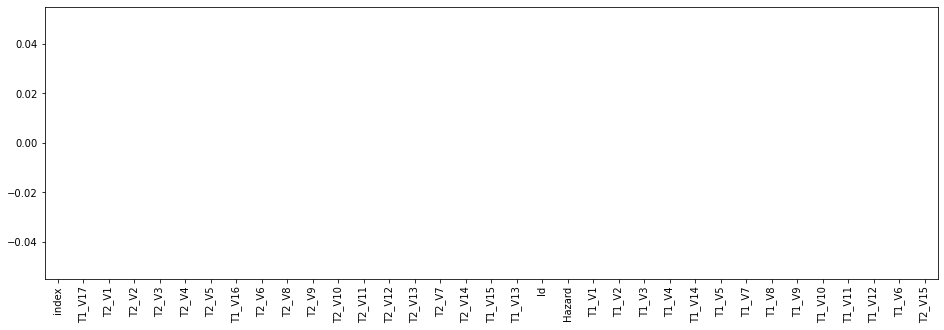

In [34]:
train_df.isnull().sum(axis=0).sort_values().plot(kind='bar', figsize=(16, 5));

### Clearly we don't have missing values !!!

#### Here we want to determine Numerical and Categorical variables

It is necessary to seperate numerical and categorical features. 

In [36]:
# Numerical features : features which are not "object":
numeric_train=train_df.select_dtypes(exclude=["object"]).columns
#Target value is "Sale Price" so necessary to eliminate this column in numerial features selection
numeric_train=numeric_train.drop("Hazard")

In [37]:
train_df_n=train_df[numeric_train]

In [38]:
# Categorical features : features which are  "object":
categoric_train=train_df.select_dtypes(include=["object"]).columns

In [39]:
train_df_c=train_df[categoric_train]

Again here is necessary to apply all the step we did for the test data set!

In [40]:
# Numerical features : features which are not "object":
numeric_pred=pred_df.select_dtypes(exclude=["object"]).columns
#Target value is "Sale Price" is not in the test data set so we don't have to eliminate this column 

In [41]:
pred_df_n=pred_df[numeric_pred]

In [42]:
# Categorical features : features which are  "object":
categoric_pred=pred_df.select_dtypes(include=["object"]).columns

In [43]:
pred_df_c=pred_df[categoric_pred]

In [45]:
#How many missing values I have in numeric columns of my training dataframe?
result2=train_df_n.isnull().sum()
result2

#Clearly nothing for missing values!!

index     0
Id        0
T1_V1     0
T1_V2     0
T1_V3     0
T1_V10    0
T1_V13    0
T1_V14    0
T2_V1     0
T2_V2     0
T2_V4     0
T2_V6     0
T2_V7     0
T2_V8     0
T2_V9     0
T2_V10    0
T2_V14    0
T2_V15    0
dtype: int64

In [47]:
result2.nlargest()
#Clearly nothing for missing values!!

index    0
Id       0
T1_V1    0
T1_V2    0
T1_V3    0
dtype: int64

In [51]:
train_df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [54]:
 ###Other way to check if we have missing values or not
# creating bool series False for NaN values
##bool_series = pd.notnull(pred_df)
 
# displayed data only with team = NaN
##pred_df[bool_series]

### For numerical columns, how does the variable distribution look like? ex. using histograms or scatter/violin/density plots

### We can add graphic visualization for continuous data

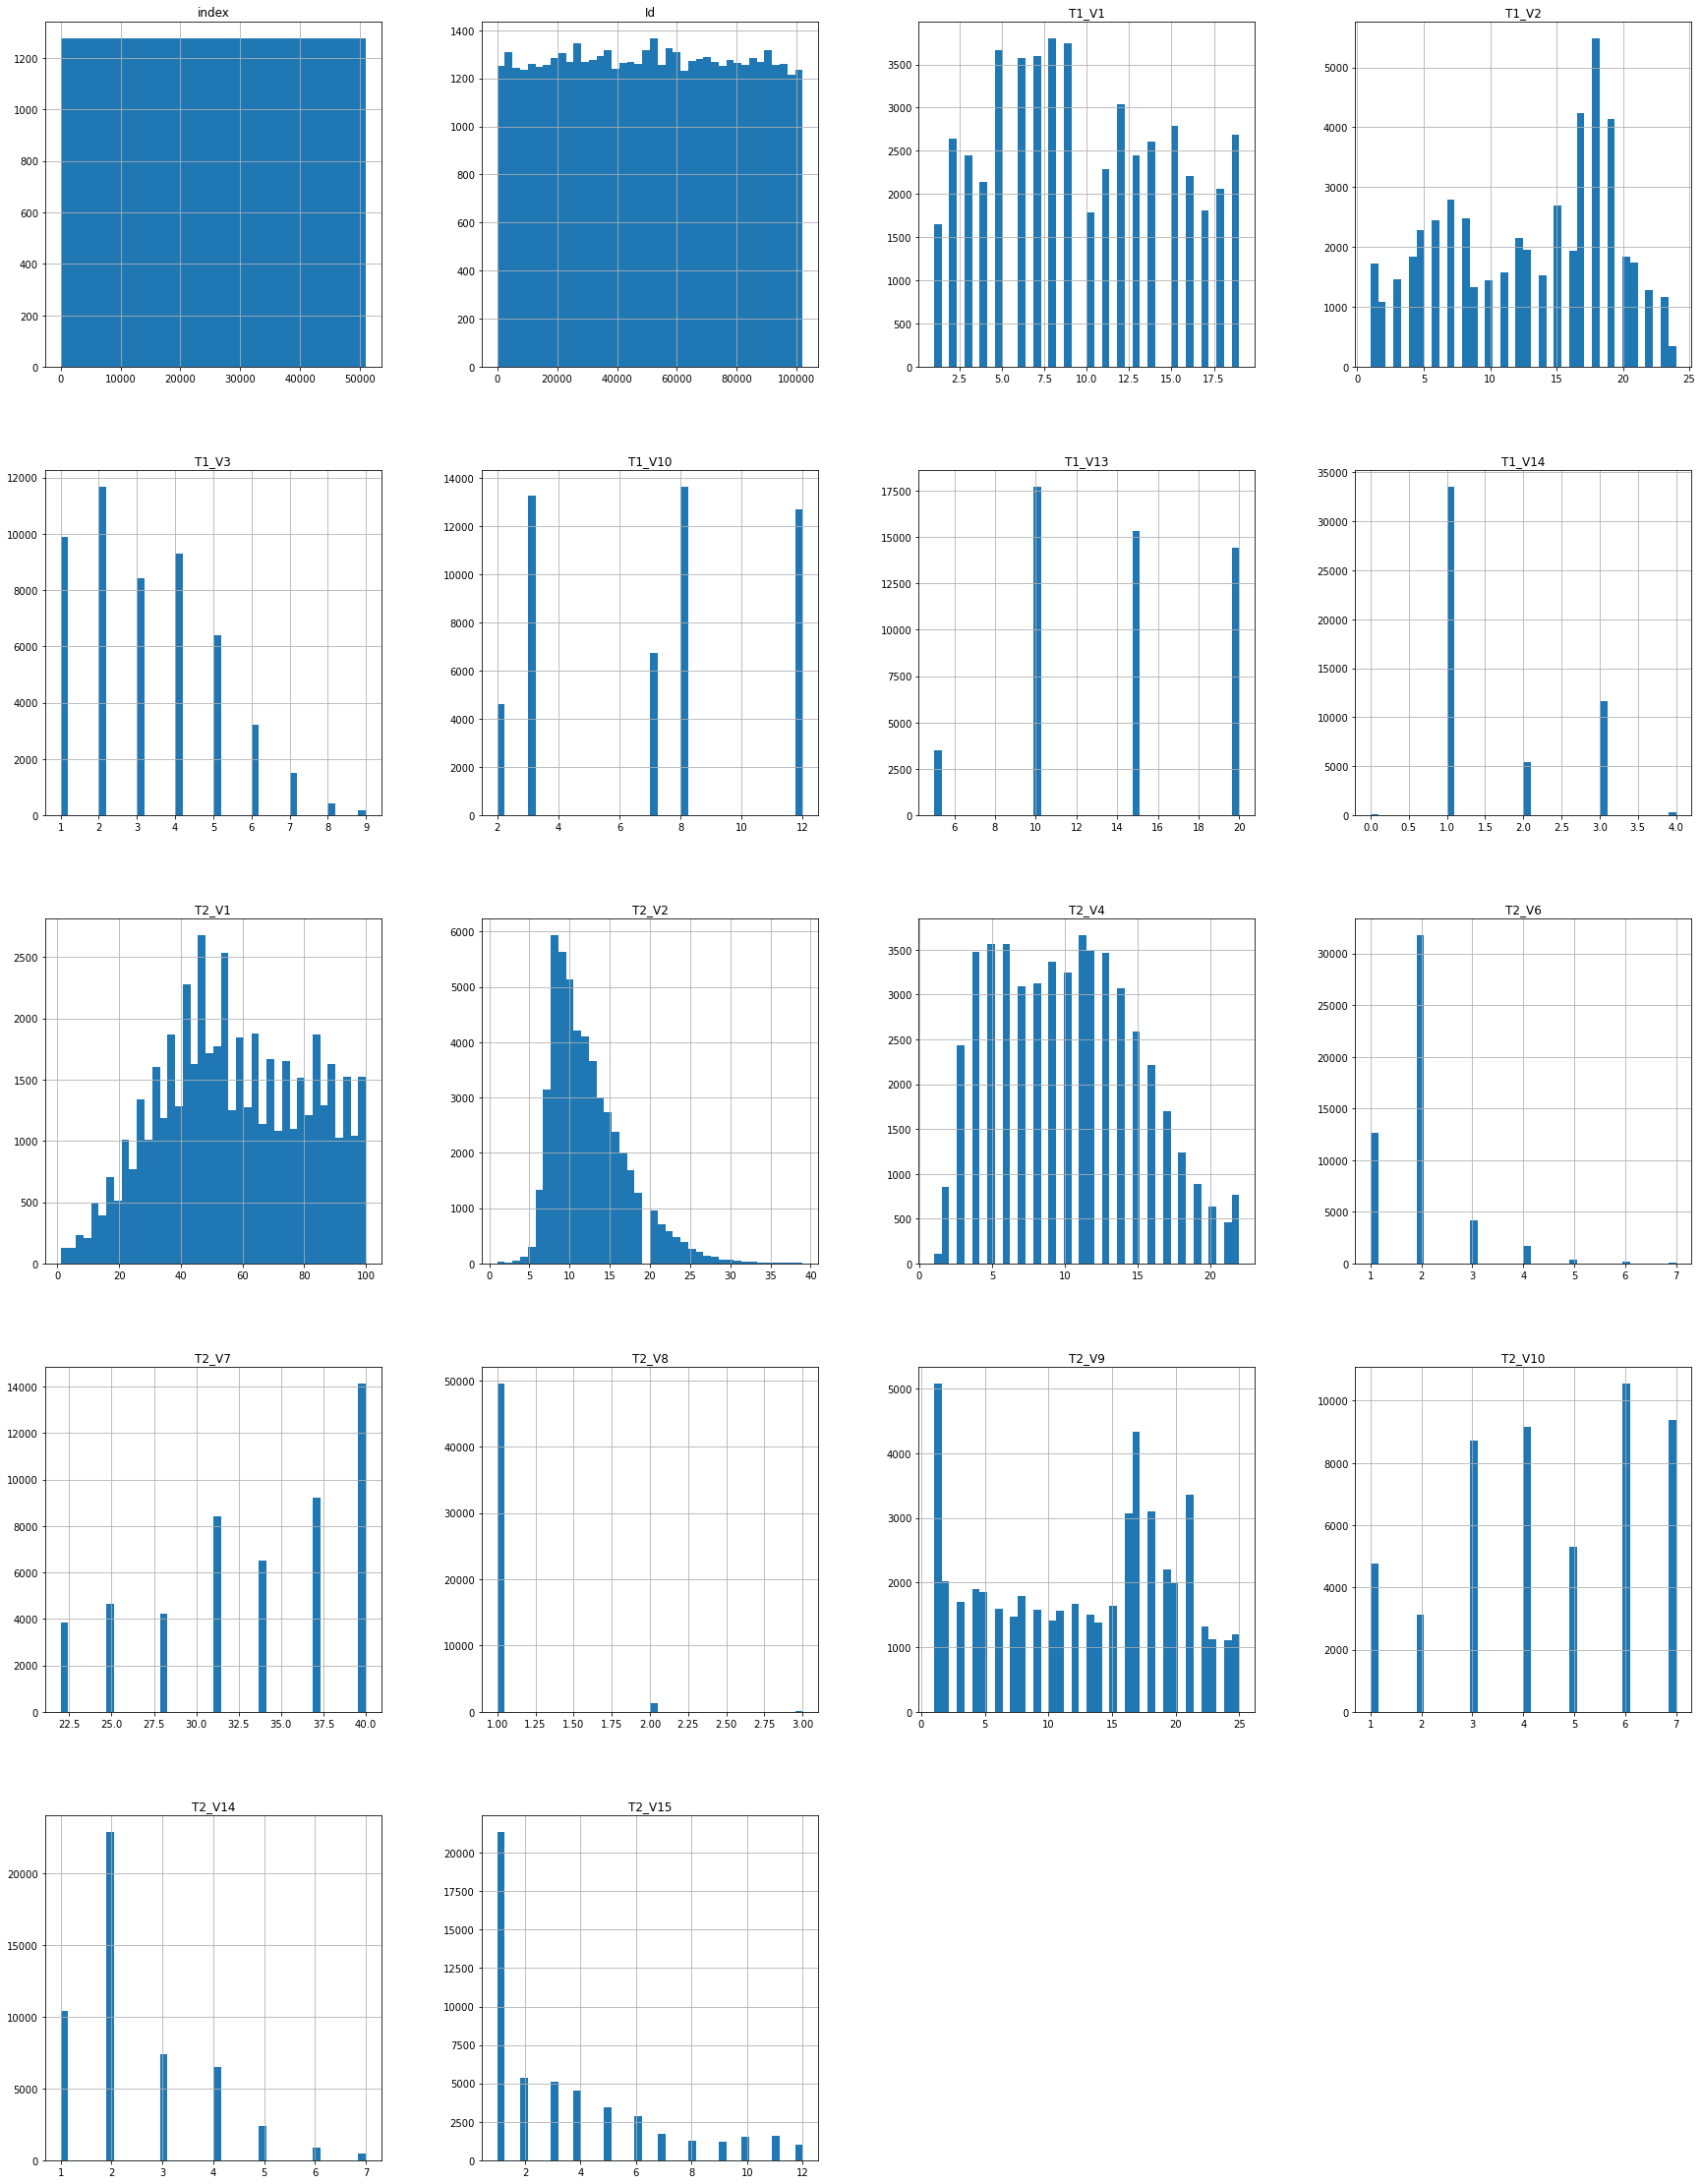

In [56]:
train_df_n.hist(bins=40,figsize=(30,40))
plt.show()

### Clearly all data are categorical only T2_V1 and T2_V2 

In [57]:
#We can focus on continuous values :
# Reminder continous variables are the following variables:
continuous_columns=['T2_V1','T2_V2'] 

In [ ]:
##mode>median>mean = left skewness
##mode<median<mean = right skewness

## What are the mean/min/max/median values of numerical columns?¶

In [58]:
train_df_n.describe().T

,count,mean,std,min,25%,50%,75%,max
index,50999.0,25499.000000,14722.287526,0.0,12749.5,25499.0,38248.5,50998.0
Id,50999.0,50929.727897,29314.685894,1.0,25660.5,50977.0,76268.5,101999.0
T1_V1,50999.0,9.722093,5.167943,1.0,6.0,9.0,14.0,19.0
T1_V2,50999.0,12.847585,6.255743,1.0,7.0,14.0,18.0,24.0
T1_V3,50999.0,3.186004,1.739369,1.0,2.0,3.0,4.0,9.0
T1_V10,50999.0,7.020451,3.595279,2.0,3.0,8.0,8.0,12.0
T1_V13,50999.0,13.996255,4.647499,5.0,10.0,15.0,20.0,20.0
T1_V14,50999.0,1.578521,0.862882,0.0,1.0,1.0,2.0,4.0
T2_V1,50999.0,57.580051,23.499818,1.0,40.0,56.0,77.0,100.0
T2_V2,50999.0,12.419616,4.783411,1.0,9.0,11.0,15.0,39.0


In [59]:
pred_df_n.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,51000.0,51070.270725,29574.299063,6.0,25336.75,51023.5,76730.25,101997.0
T1_V1,51000.0,9.711294,5.171077,1.0,6.00,9.0,14.00,19.0
T1_V2,51000.0,12.884667,6.230218,1.0,7.00,14.0,18.00,24.0
T1_V3,51000.0,3.191059,1.739954,1.0,2.00,3.0,4.00,9.0
T1_V10,51000.0,7.049843,3.592225,2.0,3.00,8.0,12.00,12.0
T1_V13,51000.0,13.992451,4.661216,5.0,10.00,15.0,20.00,20.0
T1_V14,51000.0,1.584314,0.864759,0.0,1.00,1.0,2.00,4.0
T2_V1,51000.0,57.699647,23.488590,1.0,40.00,56.0,78.00,100.0
T2_V2,51000.0,12.450843,4.821524,1.0,9.00,11.0,15.00,39.0
T2_V4,51000.0,10.220510,4.843046,1.0,6.00,10.0,14.00,22.0


In [60]:
#Now check if we have skewed features for allnumerical variables (not only continuous variasbles):
s_c = train_df_n.columns[abs(train_df_n.skew()) > 1.7]
s_c

Index(['T2_V6', 'T2_V8'], dtype='object')

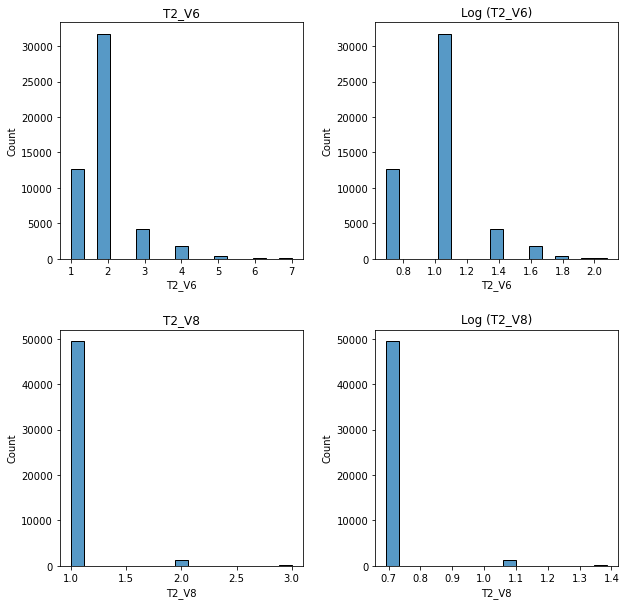

In [66]:
# plots of the continuous columns, before and after transformation. 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

for col in range(0, len(s_c)):

    # 1st columns (for P_skewed_values): Before log
    sns.histplot(train_df_n[s_c[col]],  ax = axes[col, 0])
    axes[col, 0].set_title(s_c[col]);

       
    # 2st columns: After log  
    sns.histplot(np.log1p(train_df_n[s_c[col]]),  ax = axes[col, 1])
    axes[col, 1].set_title('Log (' + s_c[col] + ')');

In [67]:
#After ifdentification of skewed features we have to transform all of them!
train_df[s_c[:-1]] = np.log1p(train_df[s_c[:-1]])
pred_df[s_c[:-1]] = np.log1p(pred_df[s_c[:-1]])

## Explore the relations between features and the sale prices. e.g how the 'Hazard' and 'T1_V1' are related to each ohter?

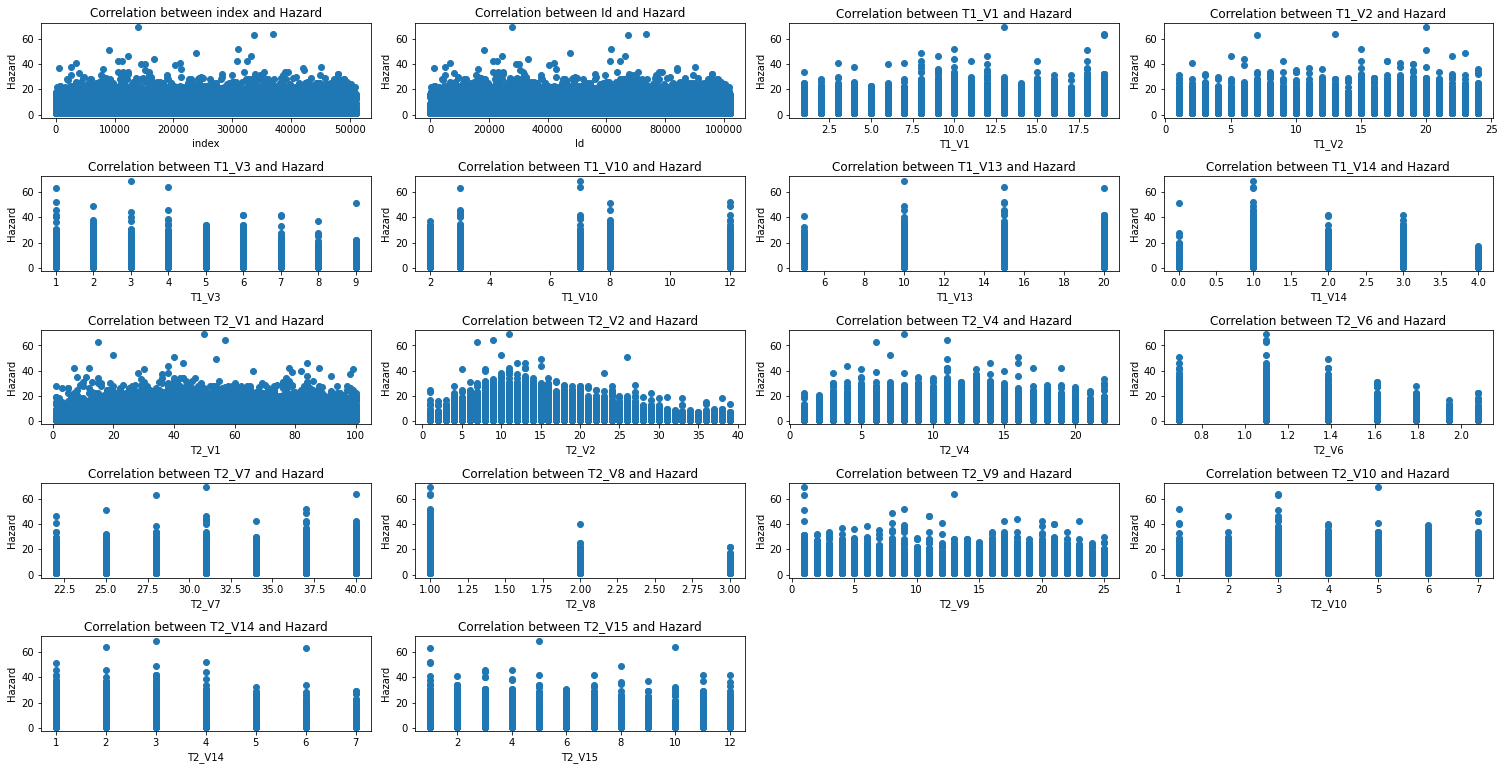

In [69]:
figure = plt.figure(figsize = (21, 21))
for (i,f) in enumerate(train_df_n.columns):
    plt.subplot(10,4,i+1)
    plt.scatter(train_df[f].tolist(),train_df['Hazard'].tolist())
    plt.title('Correlation between {} and Hazard'.format(f))
    plt.xlabel(f)
    plt.ylabel("Hazard")
    plt.tight_layout()
plt.show()

## In-depth analysis:Finding correlations

In [71]:
print("Find most important features relative to target Hazard")
train_corr = train_df.corr()
train_corr.sort_values(["Hazard"], ascending = False, inplace = True)
print(train_corr.Hazard)

Find most important features relative to target Hazard
Hazard    1.000000
T1_V2     0.103267
T2_V15    0.069263
T1_V3     0.057942
T1_V1     0.057817
T2_V4     0.036273
T2_V14    0.029673
T2_V6     0.020628
index     0.006360
Id        0.006340
T2_V7     0.004259
T2_V8     0.001084
T1_V13   -0.001011
T1_V10   -0.002556
T2_V10   -0.005671
T2_V2    -0.009940
T2_V1    -0.019824
T2_V9    -0.053852
T1_V14   -0.074026
Name: Hazard, dtype: float64


### Graphic to visualise correlation

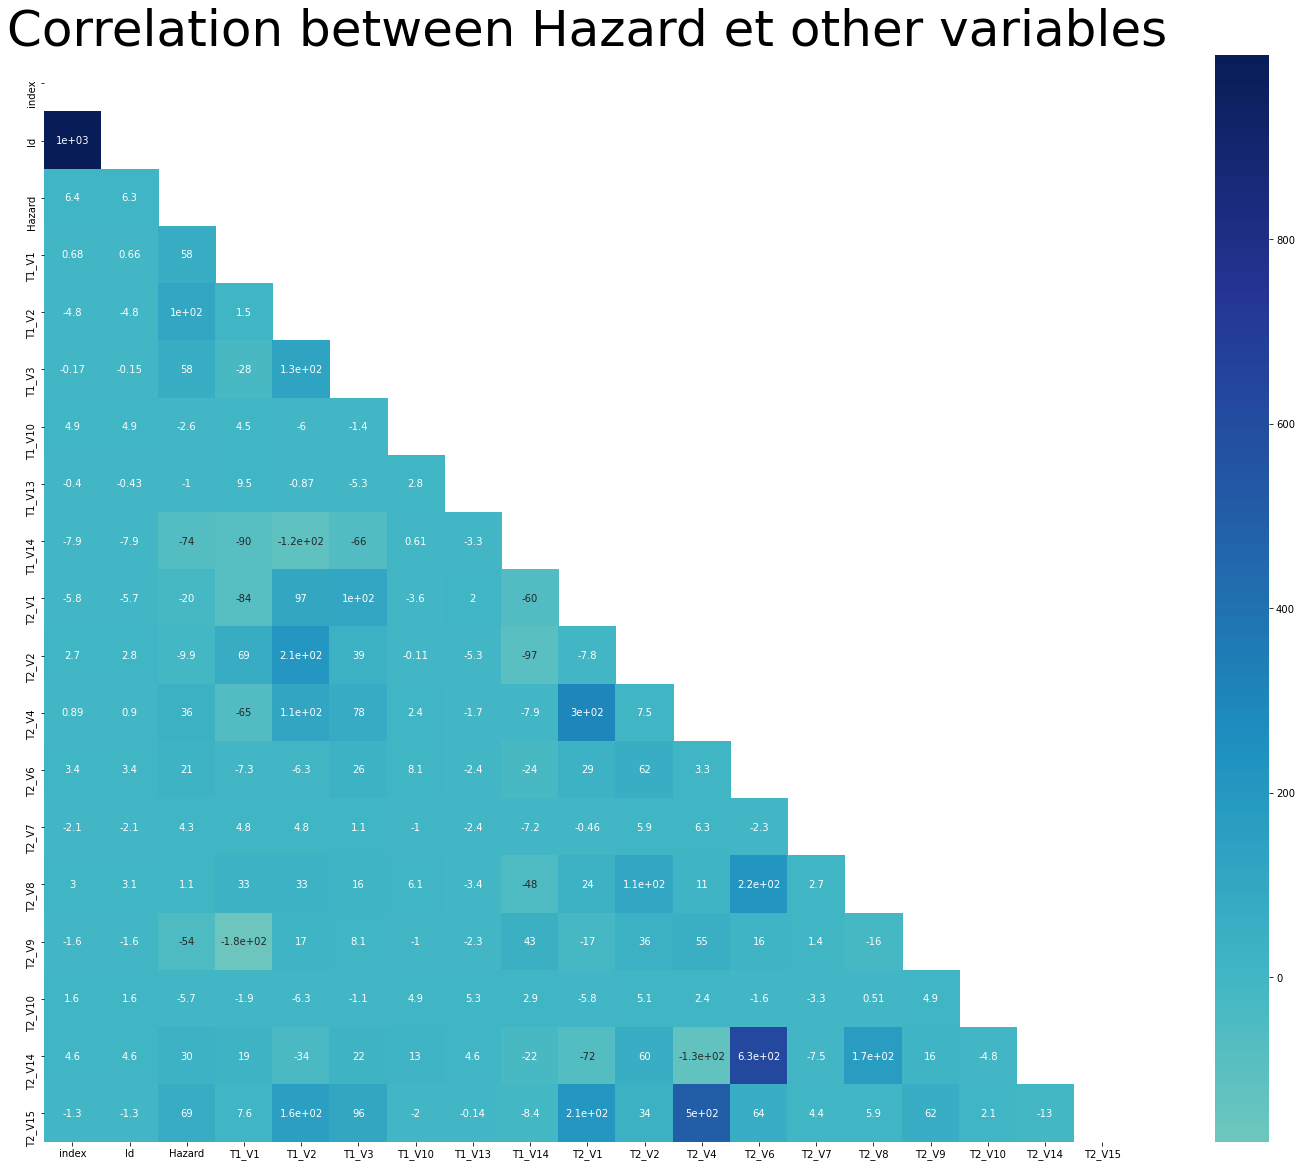

In [72]:
f = plt.figure(figsize=(30, 20))

# More easy to use a mask than all the matrix (taken from seaborn example gallery)
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Correlation between Hazard et other variables', fontsize=50)
sns.heatmap(1000*train_df.corr(),cmap="YlGnBu" ,mask=mask,center=0.20, annot=True, square=True,);

plt.show()
#Add figsize google it how to improve figsize of seaborn heatmap

Becareful we have multicollinearity ! For several features multicollinearity exist.

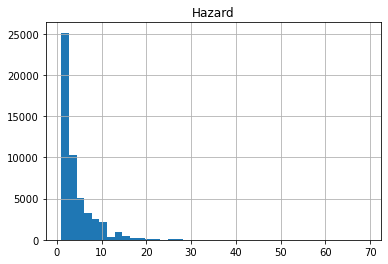

In [73]:
train_df.hist(column='Hazard',bins=40)
plt.show()

We can observe that the majority of Hazard is between 2 and 15.

Unfortunately we have extreme values, so some hazard have high exposure (above the interval we mention).

So this extreme values can lead to biased models and increase percentage of error between data set.

Logarithm transformation is important to avoid a biased model!

We can apply the logarithm transformation and use a model which predict the logarithm of the sale Price.

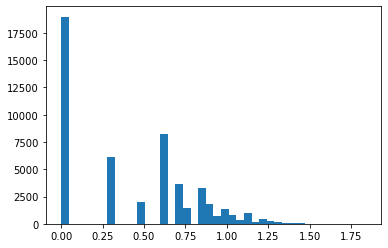

In [75]:
plt.hist(np.log10(train_df.Hazard), bins=40)
plt.show()

## Preprocess function to perform step: encoding non-numerical entries with one-hot encoding

In [76]:
#We use one-hot encoding to create dummy-variables for all the categorial non-ordinal variables here we use median value
train_df = pd.get_dummies(train_df)
for col in train_df.columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())

In [78]:
# Be careful we have multicollinearity as we see in the last cell we have to eliminate it 
pred_df = pd.get_dummies(pred_df, drop_first=True)

In [79]:
pd.isnull(train_df).sum().head(20)

index      0
Id         0
Hazard     0
T1_V1      0
T1_V2      0
T1_V3      0
T1_V10     0
T1_V13     0
T1_V14     0
T2_V1      0
T2_V2      0
T2_V4      0
T2_V6      0
T2_V7      0
T2_V8      0
T2_V9      0
T2_V10     0
T2_V14     0
T2_V15     0
T1_V4_B    0
dtype: int64

In [80]:
train_df.set_index('Hazard', inplace=True)

In [81]:
train_df.head() 

,index,Id,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15,T1_V4_B,T1_V4_C,T1_V4_E,T1_V4_G,T1_V4_H,T1_V4_N,T1_V4_S,T1_V4_W,T1_V5_A,T1_V5_B,T1_V5_C,T1_V5_D,T1_V5_E,T1_V5_H,T1_V5_I,T1_V5_J,T1_V5_K,T1_V5_L,T1_V6_N,T1_V6_Y,T1_V7_A,T1_V7_B,T1_V7_C,T1_V7_D,T1_V8_A,T1_V8_B,T1_V8_C,T1_V8_D,T1_V9_B,T1_V9_C,T1_V9_D,T1_V9_E,...,T1_V11_N,T1_V12_A,T1_V12_B,T1_V12_C,T1_V12_D,T1_V15_A,T1_V15_C,T1_V15_D,T1_V15_F,T1_V15_H,T1_V15_N,T1_V15_S,T1_V15_W,T1_V16_A,T1_V16_B,T1_V16_C,T1_V16_D,T1_V16_E,T1_V16_F,T1_V16_G,T1_V16_H,T1_V16_I,T1_V16_J,T1_V16_K,T1_V16_L,T1_V16_M,T1_V16_N,T1_V16_O,T1_V16_P,T1_V16_Q,T1_V16_R,T1_V17_N,T1_V17_Y,T2_V3_N,T2_V3_Y,T2_V5_A,T2_V5_B,T2_V5_C,T2_V5_D,T2_V5_E,T2_V5_F,T2_V11_N,T2_V11_Y,T2_V12_N,T2_V12_Y,T2_V13_A,T2_V13_B,T2_V13_C,T2_V13_D,T2_V13_E
Hazard,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,15,3,2,7,15,1,36,11,10,1.098612,37,1,11,6,2,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1
4,1,2,16,14,5,12,10,3,78,10,17,1.098612,22,1,18,5,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,2,3,10,10,5,12,15,1,71,21,13,1.945910,37,2,14,6,6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
1,3,4,18,18,5,3,15,1,71,13,15,1.098612,25,1,1,6,2,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,4,5,13,19,5,7,10,1,75,10,11,0.693147,22,1,2,7,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1


In [82]:
pred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,51000.0,51070.270725,29574.299063,6.000000,25336.750000,51023.500000,76730.250000,101997.000000
T1_V1,51000.0,9.711294,5.171077,1.000000,6.000000,9.000000,14.000000,19.000000
T1_V2,51000.0,12.884667,6.230218,1.000000,7.000000,14.000000,18.000000,24.000000
T1_V3,51000.0,3.191059,1.739954,1.000000,2.000000,3.000000,4.000000,9.000000
T1_V10,51000.0,7.049843,3.592225,2.000000,3.000000,8.000000,12.000000,12.000000
T1_V13,51000.0,13.992451,4.661216,5.000000,10.000000,15.000000,20.000000,20.000000
T1_V14,51000.0,1.584314,0.864759,0.000000,1.000000,1.000000,2.000000,4.000000
T2_V1,51000.0,57.699647,23.488590,1.000000,40.000000,56.000000,78.000000,100.000000
T2_V2,51000.0,12.450843,4.821524,1.000000,9.000000,11.000000,15.000000,39.000000
T2_V4,51000.0,10.220510,4.843046,1.000000,6.000000,10.000000,14.000000,22.000000


In [85]:
pred_df.columns

Index(['Id', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1',
       'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V14', 'T2_V15', 'T1_V4_C', 'T1_V4_E', 'T1_V4_G', 'T1_V4_H',
       'T1_V4_N', 'T1_V4_S', 'T1_V4_W', 'T1_V5_B', 'T1_V5_C', 'T1_V5_D',
       'T1_V5_E', 'T1_V5_H', 'T1_V5_I', 'T1_V5_J', 'T1_V5_K', 'T1_V5_L',
       'T1_V6_Y', 'T1_V7_B', 'T1_V7_C', 'T1_V7_D', 'T1_V8_B', 'T1_V8_C',
       'T1_V8_D', 'T1_V9_C', 'T1_V9_D', 'T1_V9_E', 'T1_V9_F', 'T1_V9_G',
       'T1_V11_B', 'T1_V11_D', 'T1_V11_E', 'T1_V11_F', 'T1_V11_H', 'T1_V11_I',
       'T1_V11_J', 'T1_V11_K', 'T1_V11_L', 'T1_V11_M', 'T1_V11_N', 'T1_V12_B',
       'T1_V12_C', 'T1_V12_D', 'T1_V15_C', 'T1_V15_D', 'T1_V15_F', 'T1_V15_H',
       'T1_V15_N', 'T1_V15_S', 'T1_V15_W', 'T1_V16_B', 'T1_V16_C', 'T1_V16_D',
       'T1_V16_E', 'T1_V16_F', 'T1_V16_G', 'T1_V16_H', 'T1_V16_I', 'T1_V16_J',
       'T1_V16_K', 'T1_V16_L', 'T1_V16_M', 'T1_V16_N', 'T1_V16_O', 'T1_V16_P',
       'T1_V1

In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50999 entries, 1 to 9
Columns: 113 entries, index to T2_V13_E
dtypes: float64(1), int64(17), uint8(95)
memory usage: 12.0 MB


In [88]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        51000 non-null  int64  
 1   T1_V1     51000 non-null  int64  
 2   T1_V2     51000 non-null  int64  
 3   T1_V3     51000 non-null  int64  
 4   T1_V10    51000 non-null  int64  
 5   T1_V13    51000 non-null  int64  
 6   T1_V14    51000 non-null  int64  
 7   T2_V1     51000 non-null  int64  
 8   T2_V2     51000 non-null  int64  
 9   T2_V4     51000 non-null  int64  
 10  T2_V6     51000 non-null  float64
 11  T2_V7     51000 non-null  int64  
 12  T2_V8     51000 non-null  int64  
 13  T2_V9     51000 non-null  int64  
 14  T2_V10    51000 non-null  int64  
 15  T2_V14    51000 non-null  int64  
 16  T2_V15    51000 non-null  int64  
 17  T1_V4_C   51000 non-null  uint8  
 18  T1_V4_E   51000 non-null  uint8  
 19  T1_V4_G   51000 non-null  uint8  
 20  T1_V4_H   51000 non-null  ui

In [91]:
# We reduce our training dataset to the variables that are available in our prediction data
train_df =  train_df[pred_df.columns]

In [92]:
train_df.reset_index(inplace=True)

In [93]:
train_df.shape , pred_df.shape

((50999, 97), (51000, 96))

## Presence of outliers ?

#The aim is to check if we have outliers or not?

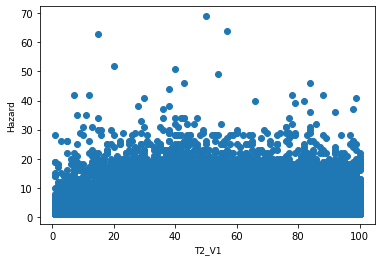

In [95]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['T2_V1'], y = train_df['Hazard'])
plt.ylabel('Hazard', fontsize=9)
plt.xlabel('T2_V1', fontsize=9)
plt.show()

In [ ]:
# Clearly we have 4 odd values after the threshold=50. I decided to eliminate outliers in the modelling part.

# D Model fitting

## Define apropriate baseline

We see in the lecture different types of baseline..

In [98]:
def MAE(y,y_pred):
    return np.mean(np.abs(y-y_pred))

In [99]:
def MSE(y,y_pred):
    return np.mean(np.square(y-y_pred))

In [100]:
def RMSE(y, y_pred):
    mse = np.mean(np.square(y - y_pred)) 
    return np.sqrt(mse)

## Let use a global view of correlated features

In [108]:
list_corr_values = train_corr.Hazard>0
print(list_corr_values)

Hazard     True
T1_V2      True
T2_V15     True
T1_V3      True
T1_V1      True
T2_V4      True
T2_V14     True
T2_V6      True
index      True
Id         True
T2_V7      True
T2_V8      True
T1_V13    False
T1_V10    False
T2_V10    False
T2_V2     False
T2_V1     False
T2_V9     False
T1_V14    False
Name: Hazard, dtype: bool


In [117]:
columns =list(train_corr)
columns = ['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V14', 'T2_V15']
print(columns)

['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V14', 'T2_V15']


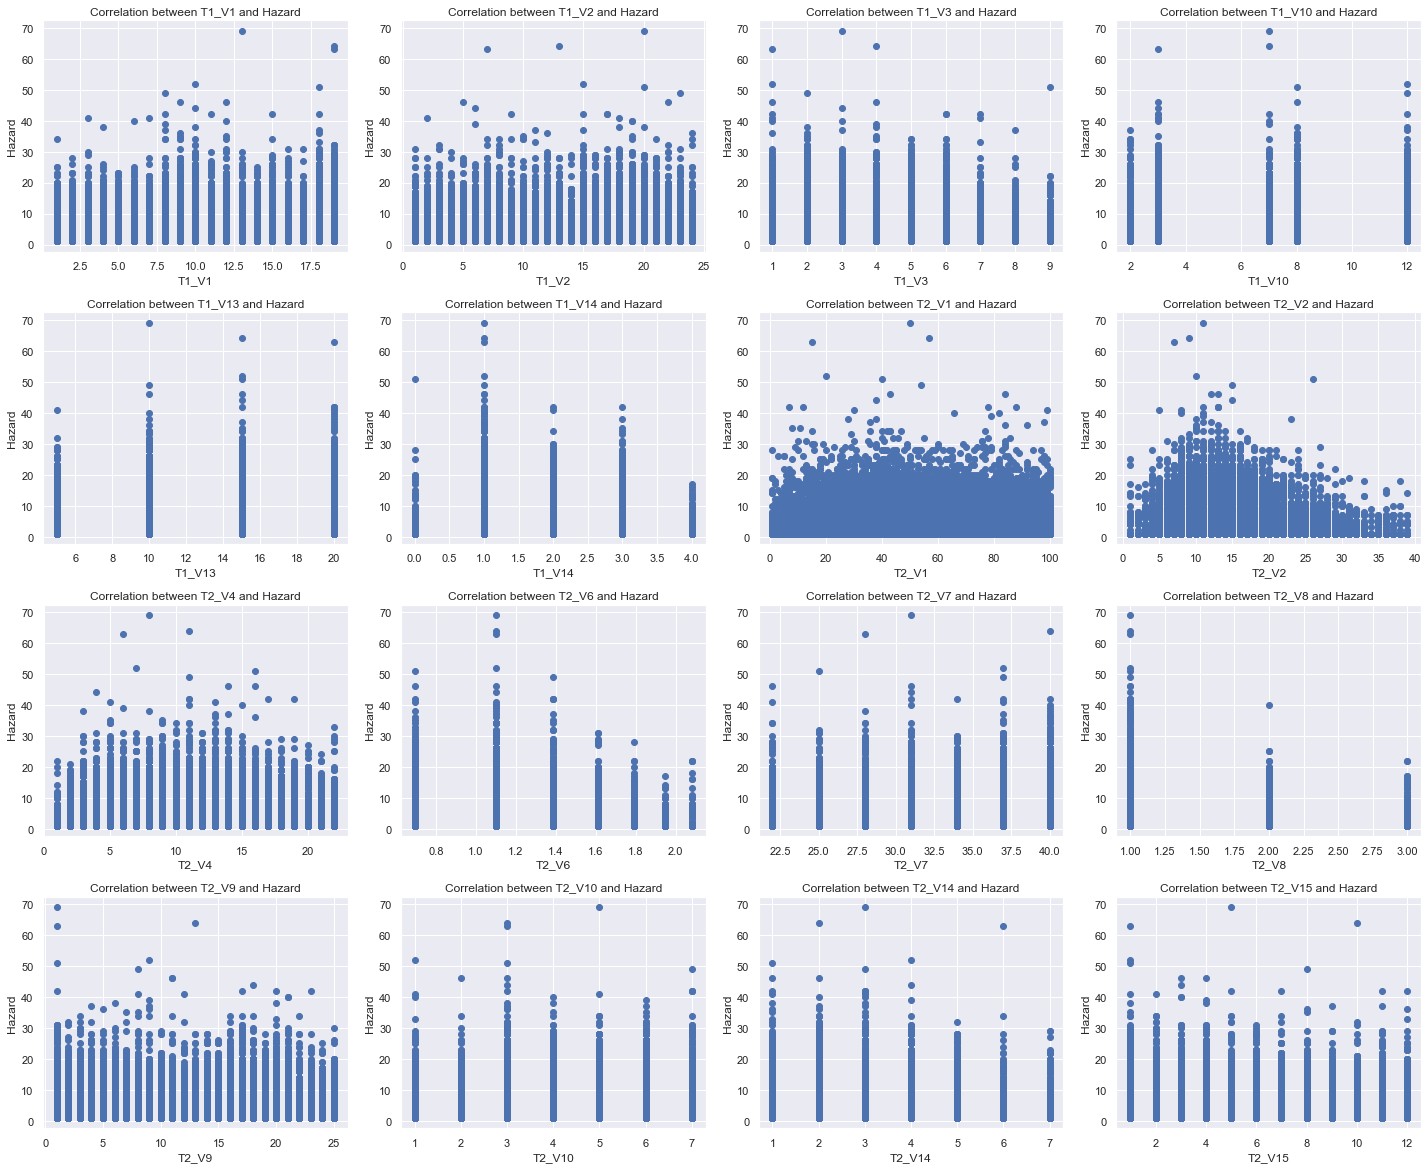

In [118]:
figure = plt.figure(figsize = (20, 20))
for (i,f) in enumerate(columns):
    plt.subplot(5,4,i+1)
    plt.scatter(train_df[f].tolist(),train_df['Hazard'].tolist())
    plt.title('Correlation between {} and Hazard'.format(f))
    plt.xlabel(f)
    plt.ylabel("Hazard")
    plt.tight_layout()
plt.show()

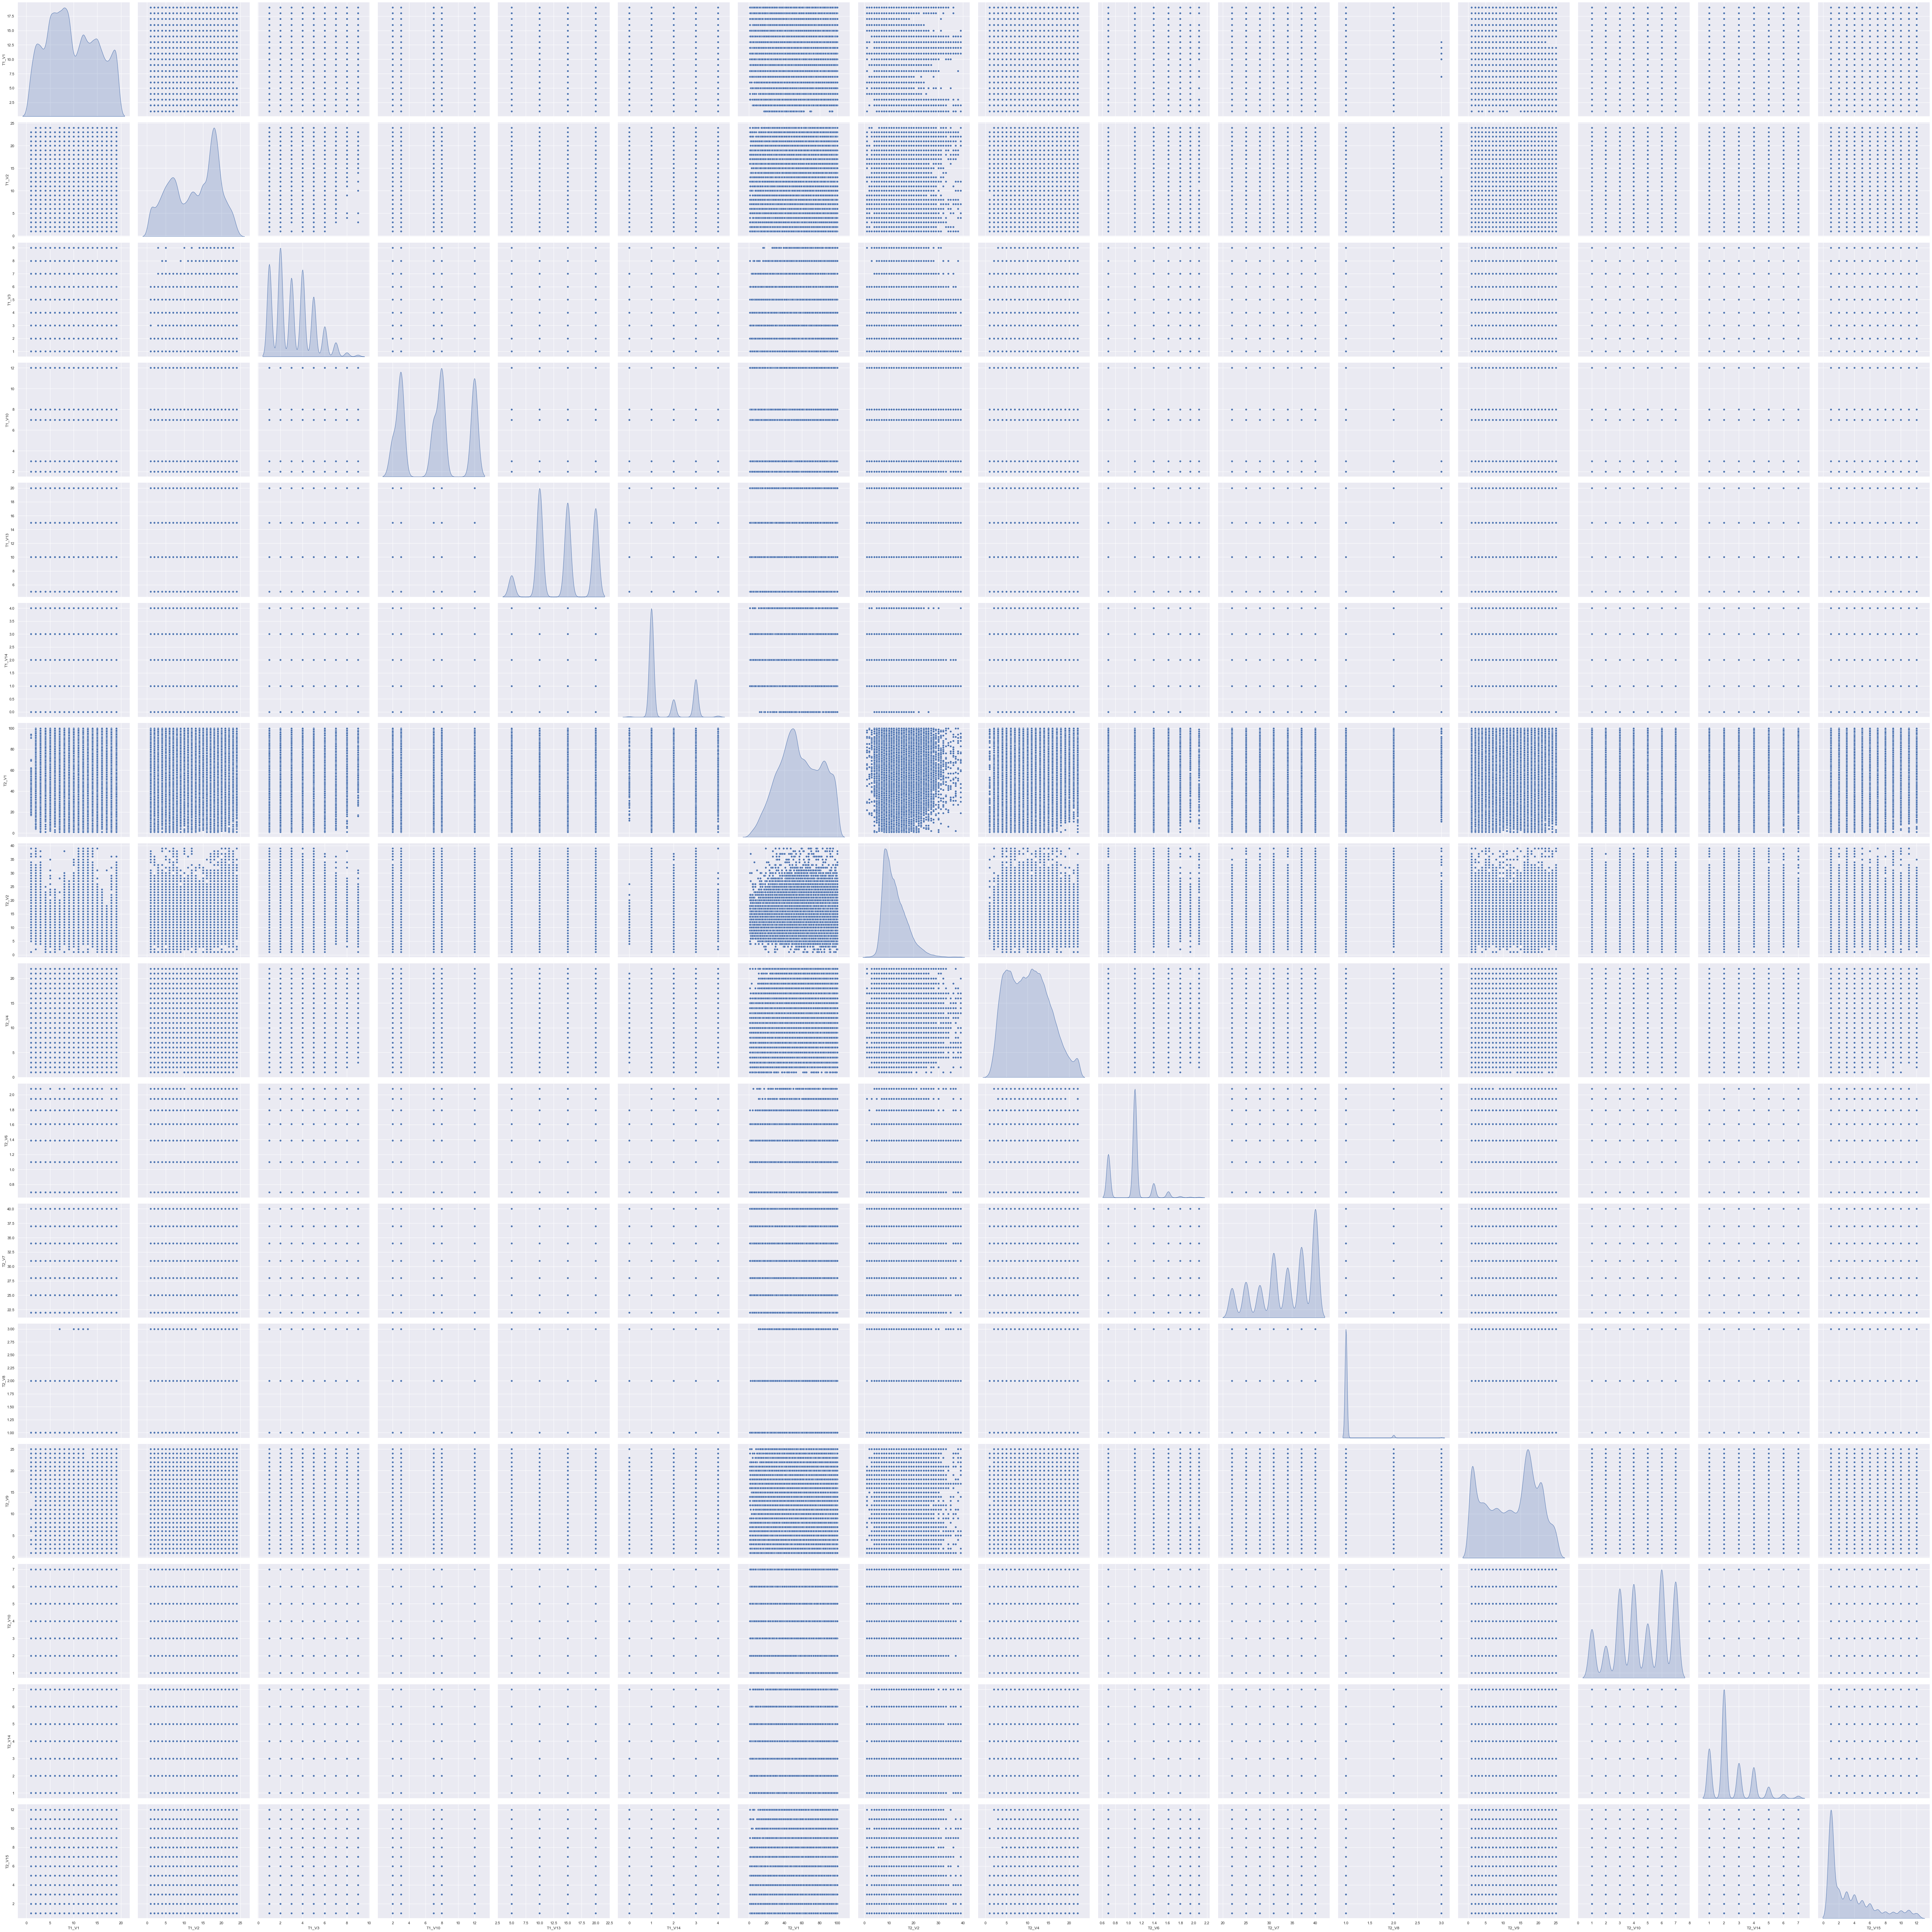

In [119]:
sns.set()
sns.pairplot(train_df[columns],size = 5, kind ='scatter', diag_kind='kde')
plt.tight_layout()
plt.show()

## A simple model with two variables (three with target variables)

In [120]:
##I want to work only with continous values. I select variables which have the higher correlation coefficients .Here I choose '##','##' accordig to the correlatiom matrix.

In [127]:
train_df.set_index('Id', inplace=True)

In [128]:
train_df.head()

,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15,T1_V4_C,T1_V4_E,T1_V4_G,T1_V4_H,T1_V4_N,T1_V4_S,T1_V4_W,T1_V5_B,T1_V5_C,T1_V5_D,T1_V5_E,T1_V5_H,T1_V5_I,T1_V5_J,T1_V5_K,T1_V5_L,T1_V6_Y,T1_V7_B,T1_V7_C,T1_V7_D,T1_V8_B,T1_V8_C,T1_V8_D,T1_V9_C,T1_V9_D,T1_V9_E,T1_V9_F,T1_V9_G,T1_V11_B,T1_V11_D,T1_V11_E,T1_V11_F,T1_V11_H,T1_V11_I,T1_V11_J,T1_V11_K,T1_V11_L,T1_V11_M,T1_V11_N,T1_V12_B,T1_V12_C,T1_V12_D,T1_V15_C,T1_V15_D,T1_V15_F,T1_V15_H,T1_V15_N,T1_V15_S,T1_V15_W,T1_V16_B,T1_V16_C,T1_V16_D,T1_V16_E,T1_V16_F,T1_V16_G,T1_V16_H,T1_V16_I,T1_V16_J,T1_V16_K,T1_V16_L,T1_V16_M,T1_V16_N,T1_V16_O,T1_V16_P,T1_V16_Q,T1_V16_R,T1_V17_Y,T2_V3_Y,T2_V5_B,T2_V5_C,T2_V5_D,T2_V5_E,T2_V5_F,T2_V11_Y,T2_V12_Y,T2_V13_B,T2_V13_C,T2_V13_D,T2_V13_E
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,15,3,2,7,15,1,36,11,10,1.098612,37,1,11,6,2,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,4,16,14,5,12,10,3,78,10,17,1.098612,22,1,18,5,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1
3,1,10,10,5,12,15,1,71,21,13,1.945910,37,2,14,6,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,0,0,1
4,1,18,18,5,3,15,1,71,13,15,1.098612,25,1,1,6,2,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
5,1,13,19,5,7,10,1,75,10,11,0.693147,22,1,2,7,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [122]:
## Create X, y

In [129]:
X=train_df.drop('Hazard', axis=1).values
y=np.log10(train_df.Hazard).values

## Split into train/test sets

In [130]:
X.shape

(50999, 95)

In [131]:
y.shape

(50999,)

In [132]:
train_df.shape

(50999, 96)

In [133]:
pred_df.shape

(51000, 96)

In [134]:
#X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.042, random_state=0)
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.3, random_state=0)

In [135]:
print('Train:', X_tr.shape, y_tr.shape) 
print('Test:', X_te.shape, y_te.shape) 

Train: (35699, 95) (35699,)
Test: (15300, 95) (15300,)


Normally we have to apply ridge regression. Before applying ridge regression we need to standardize them. Here clearly we can see we have a different scale so we need here to standardize them.

In [136]:
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

The aim is lr = LinearRegression()to fit a linear regression model.

Thanks to the platform lessons we can use recursive feature elimination with automatic tuning of the number of features selected with cross validation.

Recursive feature elimination removes features builds a model using remaining attributes and calculates model accuracy.

In [137]:
lr = LinearRegression()

In [139]:
# Recursive feature elimination with the best 3 features
rfe_simple = RFE(lr, 3)
lr_simple = rfe_simple.fit(X_tr_rescaled, y_tr)

y_tr_simple_pred = lr_simple.predict(X_tr_rescaled)
y_te_simple_pred = lr_simple.predict(X_te_rescaled)

mae_simple = MAE(10**y_te, 10**y_te_simple_pred)

print('Train data MSE: {:.3f}'.format((MSE(y_tr,y_tr_simple_pred))))
print('Test data MSE: {:.3f}'.format((MSE(y_te,y_te_simple_pred))))

print('Train data score :{}'.format(lr_simple.score(X_tr_rescaled, y_tr)))
print('Test data score:{}'.format(lr_simple.score(X_te_rescaled, y_te)))

print('Train data MAE: {:.3f}'.format(MAE(10**y_tr, 10**y_tr_simple_pred)))
print('Test data MAE: {:.3f}'.format(MAE(10**y_te, 10**y_te_simple_pred)))
train_df.drop(columns=['Hazard']).iloc[:, lr_simple.support_].head()

Train data MSE: 0.147
Test data MSE: 0.145
Train data score :0.036869771087875036
Test data score:0.04267838489485787
Train data MAE: 2.699
Test data MAE: 2.692


,T1_V2,T1_V8_C,T1_V9_E
Id,,,
1,3,0,0
2,14,0,0
3,10,0,1
4,18,0,1
5,19,0,1


In [140]:
# Recursive feature elimination with the best 20 features (intermediate, between 10 and 20)
rfe_interm = RFE(lr, 20)
lr_interm = rfe_interm.fit(X_tr_rescaled, y_tr)

y_tr_interm_pred = lr_interm.predict(X_tr_rescaled)
y_te_interm_pred = lr_interm.predict(X_te_rescaled)

mae_interm = MAE(10**y_te, 10**y_te_interm_pred)

print('Train data MSE: {:.3f}'.format((MSE(y_tr, y_tr_interm_pred))))
print('Test data MSE: {:.3f}'.format((MSE(y_te, y_te_interm_pred))))

print('Train data score :{}'.format(lr_interm.score(X_tr_rescaled, y_tr)))
print('Test data score:{}'.format(lr_interm.score(X_te_rescaled, y_te)))

print('Train data MAE: {:.3f}'.format(MAE(10**y_tr, 10**y_tr_interm_pred)))
print('Test data MAE: {:.3f}'.format(MAE(10**y_te, 10**y_te_interm_pred)))
train_df.drop(columns=['Hazard']).iloc[:, lr_interm.support_].head()

Train data MSE: 0.143
Test data MSE: 0.142
Train data score :0.06252817156814616
Test data score:0.06277112631122872
Train data MAE: 2.659
Test data MAE: 2.658


,T1_V2,T1_V3,T2_V9,T1_V4_N,T1_V8_C,T1_V9_E,T1_V9_F,T1_V11_H,T1_V11_I,T1_V11_J,T1_V11_M,T1_V11_N,T1_V12_C,T1_V15_C,T1_V15_N,T1_V16_K,T1_V16_N,T1_V16_Q,T1_V16_R,T2_V5_B
Id,,,,,,,,,,,,,,,,,,,,
1,3,2,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,14,5,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10,5,14,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,18,5,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,19,5,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [141]:
# Linear regression with all features
lr.fit(X_tr_rescaled, y_tr)

y_tr_lr_pred = lr.predict(X_tr_rescaled)
y_te_lr_pred = lr.predict(X_te_rescaled)

print('Train data MSE: {:.3f}'.format((MSE(y_tr, y_tr_lr_pred))))
print('Test data MSE: {:.3f}'.format((MSE(y_te, y_te_lr_pred))))

print('Train data score :{}'.format(lr.score(X_tr_rescaled, y_tr)))
print('Test data score:{}'.format(lr.score(X_te_rescaled, y_te)))

Train data MSE: 0.140
Test data MSE: 0.140
Train data score :0.0798385813668554
Test data score:0.07508387729965371


In [142]:
# Recursive feature elimination validation curve
# Variable to store the results
gs_results = []

for feature in range(1, 25): 
    # Create and fit linear regression 
    rfe = RFE(lr, feature) 
    rfe.fit(X_tr_rescaled, y_tr)
    # Save model and its performance on train/test sets
    gs_results.append({ 'feature': feature,
                        'train_mse': MSE(y_tr, rfe.predict(X_tr_rescaled)), 
                        'test_mse': MSE(y_te, rfe.predict(X_te_rescaled)), 
                        'train_mae': MAE(10**y_tr, 10**rfe.predict(X_tr_rescaled)), 
                        'test_mae': MAE(10**y_te, 10**rfe.predict(X_te_rescaled)),
})
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results) 
gs_results.head()

,feature,train_mse,test_mse,train_mae,test_mae
0,1,0.149846,0.148541,2.730825,2.726703
1,2,0.148117,0.146401,2.715774,2.710320
2,3,0.146521,0.144543,2.698791,2.692304
3,4,0.145506,0.143480,2.687927,2.680965
4,5,0.144772,0.142810,2.680734,2.674094


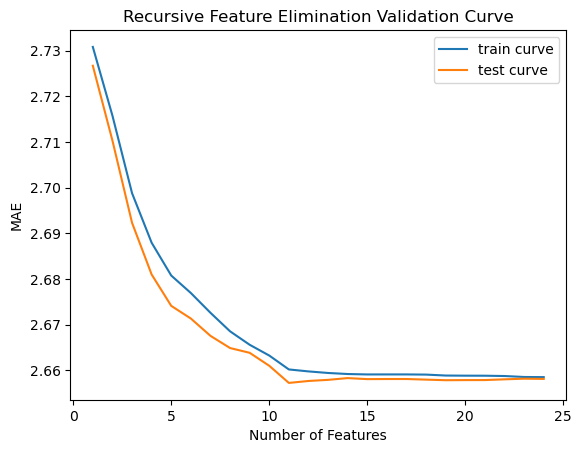

In [143]:
# Plot the validation curves
plt.style.use('default')
plt.plot(gs_results['feature'], gs_results['train_mae'], label='train curve') 
plt.plot(gs_results['feature'], gs_results['test_mae'], label='test curve') 
plt.xlabel('Number of Features')
plt.ylabel('MAE')
plt.title('Recursive Feature Elimination Validation Curve')
plt.legend()
plt.show()

## Regularization

This method has as aim to add penalty on the coefficients.

Thanks to platform lessons we can see two methods to penalize coeffcients:

-Ridge 

-Lasso 

## Ridge regression

In [144]:
# Variable to store the results
gs_results = []

# We have to select different values  for alpha:
alphas = [0.1, 1, 1e1, 1e2, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]

# Grid search
# for alpha in np.logspace(1, 4, num=20):

for alpha in alphas:

    # Create and fit ridge regression 
    ridge = Ridge(alpha=alpha) 
    ridge.fit(X_tr_rescaled, y_tr)
    y_tr_pred_ridge = ridge.predict(X_tr_rescaled)
    y_te_pred_ridge = ridge.predict(X_te_rescaled)
    # Save model and its performance on train/test sets
    gs_results.append({ 'alpha': alpha,
                        'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)), 
                        'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)), 
                        'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)), 
                        'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
})
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results) 
gs_results.head()

,alpha,train_mse,train_mae,test_mse,test_mae
0,0.1,0.139984,2.630380,0.139651,2.633537
1,1.0,0.139985,2.630388,0.139636,2.633500
2,10.0,0.139989,2.630451,0.139610,2.633419
3,100.0,0.139993,2.630680,0.139599,2.633568
4,1000.0,0.140027,2.632601,0.139566,2.635027


In [145]:
#Cross validation
# Fit/test N models
gs_results = []
# alphas = [0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]

for run_idx in range(10):
    # Split into train/test sets
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
      
    # Standardize features
    X_tr_rescaled = scaler.fit_transform(X_tr) 
    X_te_rescaled = scaler.transform(X_te)
    
    # Grid search
    for alpha in np.logspace(-1, 4, num=20):

        # Create and fit ridge regression 
        ridge = Ridge(alpha=alpha) 
        ridge.fit(X_tr_rescaled, y_tr)
        # Save model and its performance on train/test sets
        gs_results.append({ 
            'model': ridge, 
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)), 
            'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)), 
            'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)), 
            'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
})
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results) 
gs_results.head()

,model,alpha,run_idx,train_mse,train_mae,test_mse,test_mae
0,Ridge(alpha=0.1),0.100000,0,0.139984,2.630380,0.139651,2.633537
1,Ridge(alpha=0.18329807108324356),0.183298,0,0.139984,2.630380,0.139649,2.633532
2,Ridge(alpha=0.33598182862837817),0.335982,0,0.139984,2.630381,0.139646,2.633523
3,Ridge(alpha=0.6158482110660264),0.615848,0,0.139984,2.630383,0.139641,2.633511
4,Ridge(alpha=1.1288378916846888),1.128838,0,0.139985,2.630390,0.139634,2.633497


In [146]:
# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')
  
# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mae.mean() 
mean_te = gb_alpha.test_mae.mean() 
std_tr = gb_alpha.train_mae.std() 
std_te = gb_alpha.test_mae.std() 
alphas = mean_tr.index.values
  
# Get entry with the best mean test MSE
best_alpha = mean_te.idxmin()
best_result = gb_alpha.get_group(best_alpha)

# Print the details
print('Best alpha: {:.1e}'.format(best_alpha)) 
print('Test MSE: {:.4f}'.format(best_result.test_mse.mean())) 
print('Test MAE: {:.0f}'.format(best_result.test_mae.mean()))

Best alpha: 7.0e+00
Test MSE: 0.1396
Test MAE: 3


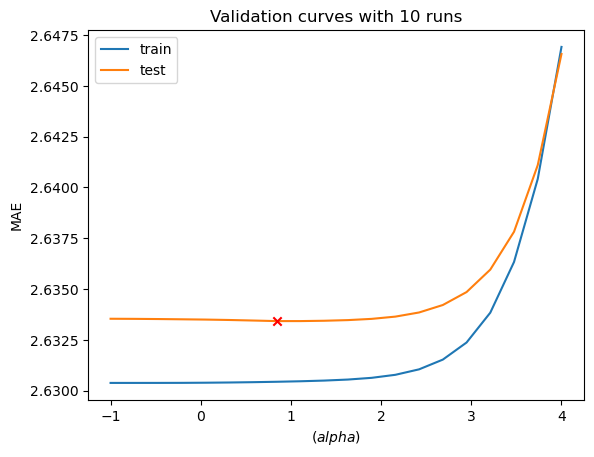

In [147]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label='train') 
plt.plot(np.log10(alphas), mean_te, label='test')
# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha=0.2) 
plt.fill_between(np.log10(alphas), mean_te-std_te, mean_te+std_te, alpha=0.2)
# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_te.min(), marker='x', c='red', zorder=10)

plt.title('Validation curves with {} runs'.format(len(gs_results.groupby('run_idx')))) 
plt.xlabel('$(alpha)$')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [148]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100, 200])
ridge.fit(X_tr_rescaled,y_tr)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_tr_rescaled,y_tr)

alpha = ridge.alpha_
print("Best alpha :", alpha)
print(MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)))
print(MAE(10**y_te, 10**ridge.predict(X_te_rescaled)))


best alpha 0.06
Try again for more precision with alphas centered around 0.06
Best alpha : 0.036
2.630379595151762
2.6335414920351963


In [149]:
y_tr_rdg = ridge.predict(X_tr_rescaled)
y_te_rdg = ridge.predict(X_te_rescaled)

## Compute baseline

In [150]:
mae_base = np.mean(np.abs(10**y_te - 10**np.mean(y_tr)))
mae_ridge = MAE(10**y_te, 10**y_te_rdg)

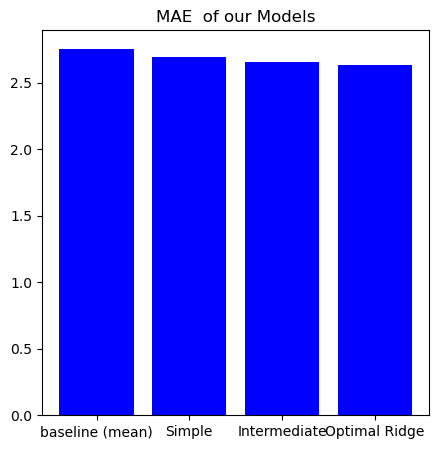

In [152]:
fig = plt.figure(figsize=(5,5))
plt.bar([1, 2, 3, 4],[mae_base, mae_simple, mae_interm, mae_ridge], color="blue")
plt.xticks([1, 2, 3, 4], ['baseline (mean)', 'Simple','Intermediate','Optimal Ridge'])
plt.title('MAE  of our Models')
plt.show()

## Evaluate my predictions

In [153]:
pred_df.set_index('Id', inplace=True)

In [154]:
pred_df.shape

(51000, 95)

In [155]:
X_te_rescaled.shape

(15300, 95)

In [156]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.042, random_state=0)

In [157]:
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

In [158]:
pred_scaled = scaler.transform(pred_df)

### Simple model predictions

In [163]:
predictions_simple = lr_simple.predict(pred_scaled)

In [164]:
pred_df['predictions_simple'] = predictions_simple

In [165]:
pred_df['Hazard'] = 10**pred_df['predictions_simple']

In [166]:
pred_df['Hazard'].head()

Id
6     2.430030
7     2.309957
8     3.295537
9     2.644181
10    2.557923
Name: Hazard, dtype: float64

In [167]:
pred_df.reset_index(inplace=True)

In [168]:
predictions_df = pred_df[['Id','Hazard']]
predictions_df.head()

,Id,Hazard
0,6,2.430030
1,7,2.309957
2,8,3.295537
3,9,2.644181
4,10,2.557923


In [170]:
predictions_df['Hazard'].describe()

count    51000.000000
mean         2.708152
std          0.513877
min          1.984178
25%          2.389327
50%          2.644181
75%          2.928025
max          6.097700
Name: Hazard, dtype: float64

In [171]:
predictions_df.to_csv('predictions-simple-model.csv', index=False, float_format='%.0f')

### Intermediate model predictions

In [172]:
predictions_interm = lr_interm.predict(pred_scaled)

In [173]:
pred_df['predictions_interm'] = predictions_interm

In [174]:
pred_df['Hazard'] = 10**pred_df['predictions_interm']

In [175]:
pred_df['Hazard'].head()

0    2.222204
1    2.850151
2    3.352675
3    2.569123
4    2.650773
Name: Hazard, dtype: float64

In [176]:
pred_df.reset_index(inplace=True)

In [177]:
predictions_df = pred_df[['Id','Hazard']]
predictions_df.head()

,Id,Hazard
0,6,2.222204
1,7,2.850151
2,8,3.352675
3,9,2.569123
4,10,2.650773


In [178]:
predictions_df['Hazard'].describe()

count    51000.000000
mean         2.735396
std          0.679027
min          1.220226
25%          2.307936
50%          2.634689
75%          3.025674
max         10.285843
Name: Hazard, dtype: float64

In [179]:
predictions_df.to_csv('predictions-intermediate-model.csv', index=False, float_format='%.0f')

## Complex model predictions

In [180]:
predictions_ridge=ridge.predict(pred_scaled)

In [181]:
pred_df['predictions_ridge'] = predictions_ridge

In [182]:
pred_df['Hazard'] = 10**pred_df['predictions_ridge']

In [183]:
pred_df['Hazard'].head()

0    2.076616
1    3.659747
2    3.719709
3    2.518492
4    3.024056
Name: Hazard, dtype: float64

In [184]:
pred_df.reset_index(inplace=True)

In [186]:
predictions_df = pred_df[['Id','Hazard']]
predictions_df.head()

,Id,Hazard
0,6,2.076616
1,7,3.659747
2,8,3.719709
3,9,2.518492
4,10,3.024056


In [187]:
predictions_df['Hazard'].describe()

count    51000.000000
mean         2.754925
std          0.776630
min          0.753206
25%          2.252727
50%          2.650811
75%          3.094658
max         17.706154
Name: Hazard, dtype: float64

In [188]:
predictions_df.to_csv('predictions-complex-model.csv', index=False, float_format='%.0f')